In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
city = 'cartagena'

In [3]:
series1 = pd.read_csv( './data/agents/clean/{}-1.csv'.format( city ) )
series2 = pd.read_csv( './data/agents/clean/{}-2.csv'.format( city ) )
series3 = pd.read_csv( './data/agents/clean/{}-3.csv'.format( city ) )
series4 = pd.read_csv( './data/agents/clean/{}-4.csv'.format( city ) )

In [4]:
series1[ 'Fecha' ] = pd.to_datetime( series1[ 'Fecha' ] )
series2[ 'Fecha' ] = pd.to_datetime( series2[ 'Fecha' ] )
series3[ 'Fecha' ] = pd.to_datetime( series3[ 'Fecha' ] )
series4[ 'Fecha' ] = pd.to_datetime( series4[ 'Fecha' ] )

In [5]:
series1.head()

,exp,Fecha,Graves,Críticos,Fallecidos,R0,Rt,Cuarentena
0,0,2020-03-06,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0,2020-03-07,0.0,0.0,0.0,0.000135,0.285714,0.0
2,0,2020-03-08,0.0,0.0,0.0,0.000788,0.521277,0.0
3,0,2020-03-09,0.0,0.0,0.0,0.001374,0.625000,0.0
4,0,2020-03-10,0.0,0.0,0.0,0.001982,0.727273,0.0


In [6]:
def ci( x ):
    try:
        return 1.96 * np.std( x ) / np.sqrt( len( x ) )
    except ZeroDivisionError:
        return 0

In [7]:
series1_grouped = series1.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
series1_grouped.columns = [ '_'.join( col ).strip() for col in series1_grouped.columns.values ]

In [8]:
series2_grouped = series2.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
series2_grouped.columns = [ '_'.join( col ).strip() for col in series2_grouped.columns.values ]

In [9]:
series3_grouped = series3.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
series3_grouped.columns = [ '_'.join( col ).strip() for col in series3_grouped.columns.values ]

In [10]:
series4_grouped = series4.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
series4_grouped.columns = [ '_'.join( col ).strip() for col in series4_grouped.columns.values ]

In [11]:
series1_grouped.tail()

,Graves_mean,Graves_ci,Críticos_mean,Críticos_ci,Fallecidos_mean,Fallecidos_ci,R0_mean,R0_ci,Rt_mean,Rt_ci,Cuarentena_mean
Fecha,,,,,,,,,,,
2020-09-17,0.000262,0.000027,0.000032,0.000008,0.000142,0.000022,0.464071,0.002014,0.304202,0.009247,0.559322
2020-09-18,0.000257,0.000027,0.000033,0.000009,0.000142,0.000022,0.464651,0.002003,0.302434,0.007471,0.605495
2020-09-19,0.000250,0.000023,0.000034,0.000010,0.000143,0.000022,0.465255,0.001995,0.323587,0.008900,0.543470
2020-09-20,0.000253,0.000022,0.000036,0.000010,0.000144,0.000022,0.465936,0.001959,0.330585,0.009581,0.548394
2020-09-21,0.000248,0.000022,0.000032,0.000010,0.000144,0.000022,0.466662,0.001925,0.321321,0.008748,0.550224


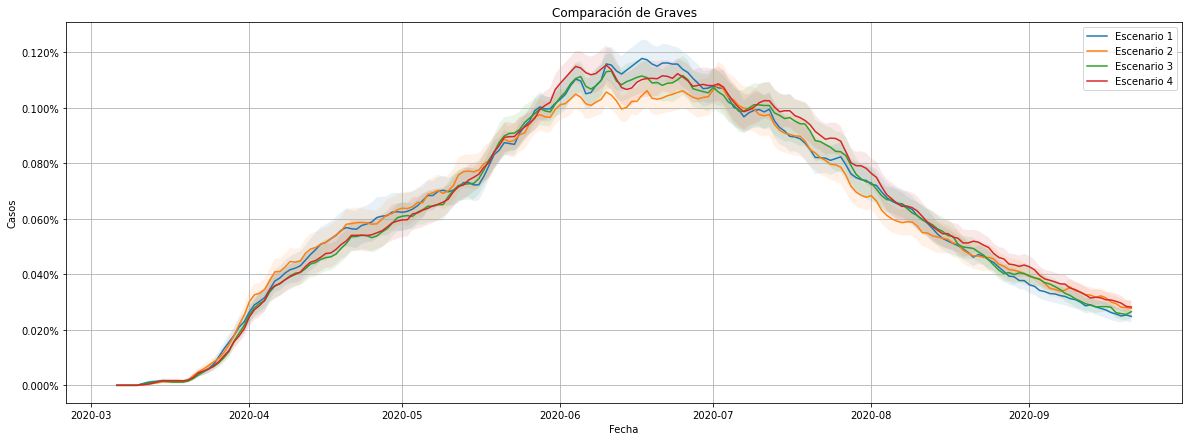

In [12]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( series1_grouped.index, series1_grouped[ 'Graves_mean' ], label = 'Escenario 1' )
ax.fill_between( series1_grouped.index, ( series1_grouped[ 'Graves_mean' ] - series1_grouped[ 'Graves_ci' ] ), ( series1_grouped[ 'Graves_mean' ] + series1_grouped[ 'Graves_ci' ] ), alpha = .1 )

ax.plot( series2_grouped.index, series2_grouped[ 'Graves_mean' ], label = 'Escenario 2' )
ax.fill_between( series2_grouped.index, ( series2_grouped[ 'Graves_mean' ] - series2_grouped[ 'Graves_ci' ] ), ( series2_grouped[ 'Graves_mean' ] + series2_grouped[ 'Graves_ci' ] ), alpha = .1 )

ax.plot( series3_grouped.index, series3_grouped[ 'Graves_mean' ], label = 'Escenario 3' )
ax.fill_between( series3_grouped.index, ( series3_grouped[ 'Graves_mean' ] - series3_grouped[ 'Graves_ci' ] ), ( series3_grouped[ 'Graves_mean' ] + series3_grouped[ 'Graves_ci' ] ), alpha = .1 )

ax.plot( series4_grouped.index, series4_grouped[ 'Graves_mean' ], label = 'Escenario 4' )
ax.fill_between( series4_grouped.index, ( series4_grouped[ 'Graves_mean' ] - series4_grouped[ 'Graves_ci' ] ), ( series4_grouped[ 'Graves_mean' ] + series4_grouped[ 'Graves_ci' ] ), alpha = .1 )

ax.set_yticklabels( [ '{:,.3%}'.format( x ) for x in ax.get_yticks() ] )

plt.title( 'Comparación de Graves' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Casos' )
plt.grid( True )
plt.legend()

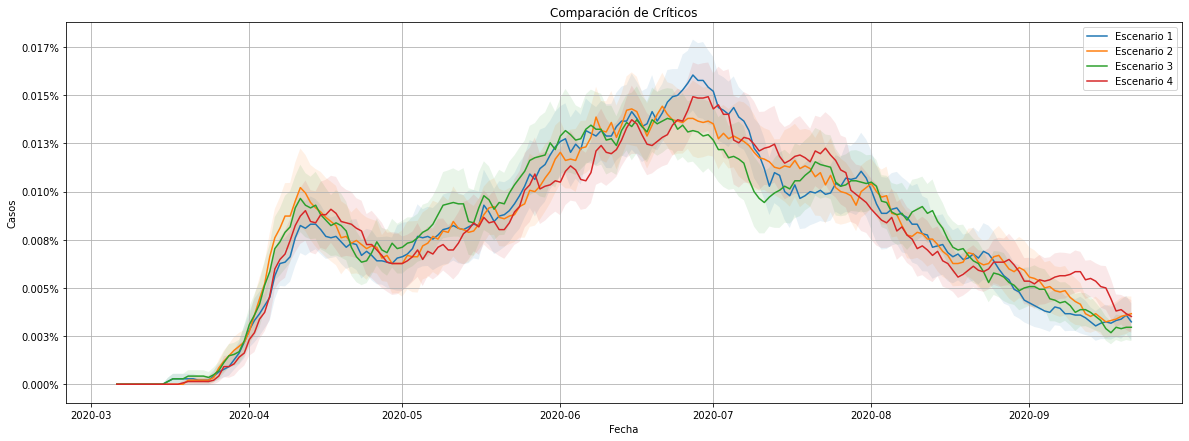

In [13]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( series1_grouped.index, series1_grouped[ 'Críticos_mean' ], label = 'Escenario 1' )
ax.fill_between( series1_grouped.index, ( series1_grouped[ 'Críticos_mean' ] - series1_grouped[ 'Críticos_ci' ] ), ( series1_grouped[ 'Críticos_mean' ] + series1_grouped[ 'Críticos_ci' ] ), alpha = .1 )

ax.plot( series2_grouped.index, series2_grouped[ 'Críticos_mean' ], label = 'Escenario 2' )
ax.fill_between( series2_grouped.index, ( series2_grouped[ 'Críticos_mean' ] - series2_grouped[ 'Críticos_ci' ] ), ( series2_grouped[ 'Críticos_mean' ] + series2_grouped[ 'Críticos_ci' ] ), alpha = .1 )

ax.plot( series3_grouped.index, series3_grouped[ 'Críticos_mean' ], label = 'Escenario 3' )
ax.fill_between( series3_grouped.index, ( series3_grouped[ 'Críticos_mean' ] - series3_grouped[ 'Críticos_ci' ] ), ( series3_grouped[ 'Críticos_mean' ] + series3_grouped[ 'Críticos_ci' ] ), alpha = .1 )

ax.plot( series4_grouped.index, series4_grouped[ 'Críticos_mean' ], label = 'Escenario 4' )
ax.fill_between( series4_grouped.index, ( series4_grouped[ 'Críticos_mean' ] - series4_grouped[ 'Críticos_ci' ] ), ( series4_grouped[ 'Críticos_mean' ] + series4_grouped[ 'Críticos_ci' ] ), alpha = .1 )

ax.set_yticklabels( [ '{:,.3%}'.format( x ) for x in ax.get_yticks() ] )

plt.title( 'Comparación de Críticos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Casos' )
plt.grid( True )
plt.legend()

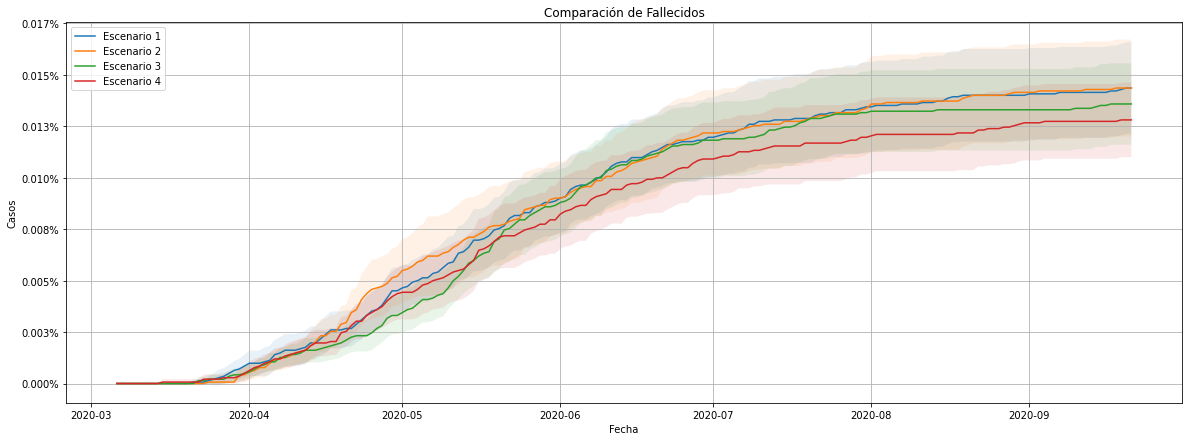

In [14]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( series1_grouped.index, series1_grouped[ 'Fallecidos_mean' ], label = 'Escenario 1' )
ax.fill_between( series1_grouped.index, ( series1_grouped[ 'Fallecidos_mean' ] - series1_grouped[ 'Fallecidos_ci' ] ), ( series1_grouped[ 'Fallecidos_mean' ] + series1_grouped[ 'Fallecidos_ci' ] ), alpha = .1 )

ax.plot( series2_grouped.index, series2_grouped[ 'Fallecidos_mean' ], label = 'Escenario 2' )
ax.fill_between( series2_grouped.index, ( series2_grouped[ 'Fallecidos_mean' ] - series2_grouped[ 'Fallecidos_ci' ] ), ( series2_grouped[ 'Fallecidos_mean' ] + series2_grouped[ 'Fallecidos_ci' ] ), alpha = .1 )

ax.plot( series3_grouped.index, series3_grouped[ 'Fallecidos_mean' ], label = 'Escenario 3' )
ax.fill_between( series3_grouped.index, ( series3_grouped[ 'Fallecidos_mean' ] - series3_grouped[ 'Fallecidos_ci' ] ), ( series3_grouped[ 'Fallecidos_mean' ] + series3_grouped[ 'Fallecidos_ci' ] ), alpha = .1 )

ax.plot( series4_grouped.index, series4_grouped[ 'Fallecidos_mean' ], label = 'Escenario 4' )
ax.fill_between( series4_grouped.index, ( series4_grouped[ 'Fallecidos_mean' ] - series4_grouped[ 'Fallecidos_ci' ] ), ( series4_grouped[ 'Fallecidos_mean' ] + series4_grouped[ 'Fallecidos_ci' ] ), alpha = .1 )

ax.set_yticklabels( [ '{:,.3%}'.format( x ) for x in ax.get_yticks() ] )

plt.title( 'Comparación de Fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Casos' )
plt.grid( True )
plt.legend()

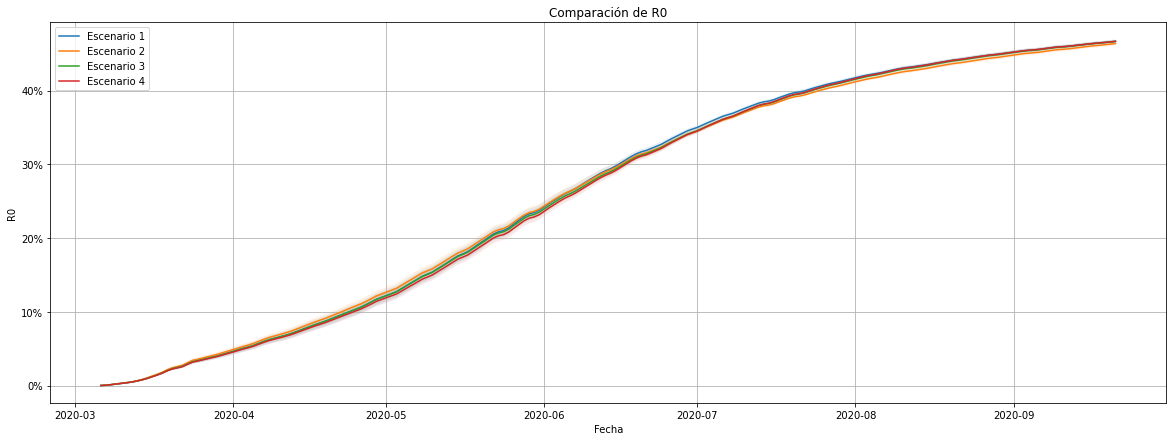

In [15]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( series1_grouped.index, series1_grouped[ 'R0_mean' ], label = 'Escenario 1' )
ax.fill_between( series1_grouped.index, ( series1_grouped[ 'R0_mean' ] - series1_grouped[ 'R0_ci' ] ), ( series1_grouped[ 'R0_mean' ] + series1_grouped[ 'R0_ci' ] ), alpha = .1 )

ax.plot( series2_grouped.index, series2_grouped[ 'R0_mean' ], label = 'Escenario 2' )
ax.fill_between( series2_grouped.index, ( series2_grouped[ 'R0_mean' ] - series2_grouped[ 'R0_ci' ] ), ( series2_grouped[ 'R0_mean' ] + series2_grouped[ 'R0_ci' ] ), alpha = .1 )

ax.plot( series3_grouped.index, series3_grouped[ 'R0_mean' ], label = 'Escenario 3' )
ax.fill_between( series3_grouped.index, ( series3_grouped[ 'R0_mean' ] - series3_grouped[ 'R0_ci' ] ), ( series3_grouped[ 'R0_mean' ] + series3_grouped[ 'R0_ci' ] ), alpha = .1 )

ax.plot( series4_grouped.index, series4_grouped[ 'R0_mean' ], label = 'Escenario 4' )
ax.fill_between( series4_grouped.index, ( series4_grouped[ 'R0_mean' ] - series4_grouped[ 'R0_ci' ] ), ( series4_grouped[ 'R0_mean' ] + series4_grouped[ 'R0_ci' ] ), alpha = .1 )

ax.set_yticklabels( [ '{:,.0%}'.format( x ) for x in ax.get_yticks() ] )

plt.title( 'Comparación de R0' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'R0' )
plt.grid( True )
plt.legend()

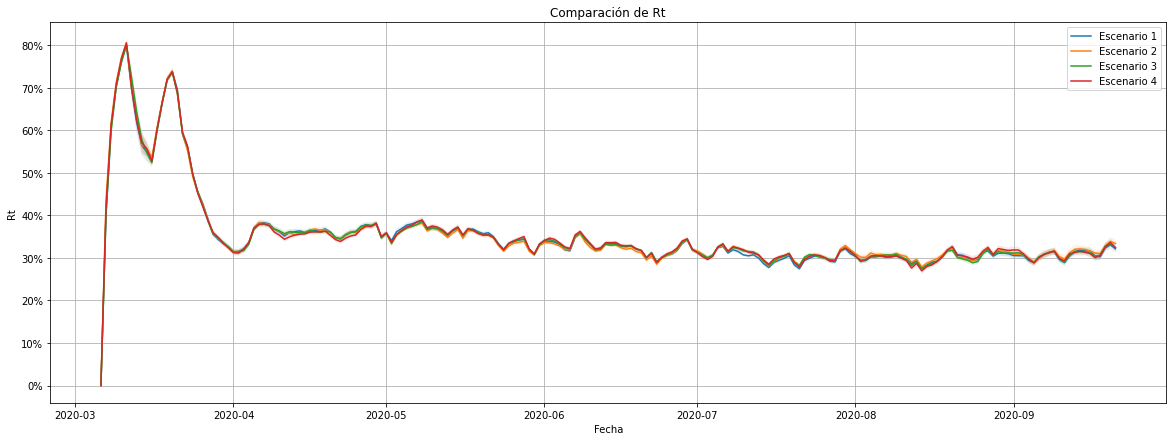

In [16]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( series1_grouped.index, series1_grouped[ 'Rt_mean' ], label = 'Escenario 1' )
ax.fill_between( series1_grouped.index, ( series1_grouped[ 'Rt_mean' ] - series1_grouped[ 'Rt_ci' ] ), ( series1_grouped[ 'Rt_mean' ] + series1_grouped[ 'Rt_ci' ] ), alpha = .1 )

ax.plot( series2_grouped.index, series2_grouped[ 'Rt_mean' ], label = 'Escenario 2' )
ax.fill_between( series2_grouped.index, ( series2_grouped[ 'Rt_mean' ] - series2_grouped[ 'Rt_ci' ] ), ( series2_grouped[ 'Rt_mean' ] + series2_grouped[ 'Rt_ci' ] ), alpha = .1 )

ax.plot( series3_grouped.index, series3_grouped[ 'Rt_mean' ], label = 'Escenario 3' )
ax.fill_between( series3_grouped.index, ( series3_grouped[ 'Rt_mean' ] - series3_grouped[ 'Rt_ci' ] ), ( series3_grouped[ 'Rt_mean' ] + series3_grouped[ 'Rt_ci' ] ), alpha = .1 )

ax.plot( series4_grouped.index, series4_grouped[ 'Rt_mean' ], label = 'Escenario 4' )
ax.fill_between( series4_grouped.index, ( series4_grouped[ 'Rt_mean' ] - series4_grouped[ 'Rt_ci' ] ), ( series4_grouped[ 'Rt_mean' ] + series4_grouped[ 'Rt_ci' ] ), alpha = .1 )

ax.set_yticklabels( [ '{:,.0%}'.format( x ) for x in ax.get_yticks() ] )

plt.title( 'Comparación de Rt' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Rt' )
plt.grid( True )
plt.legend()

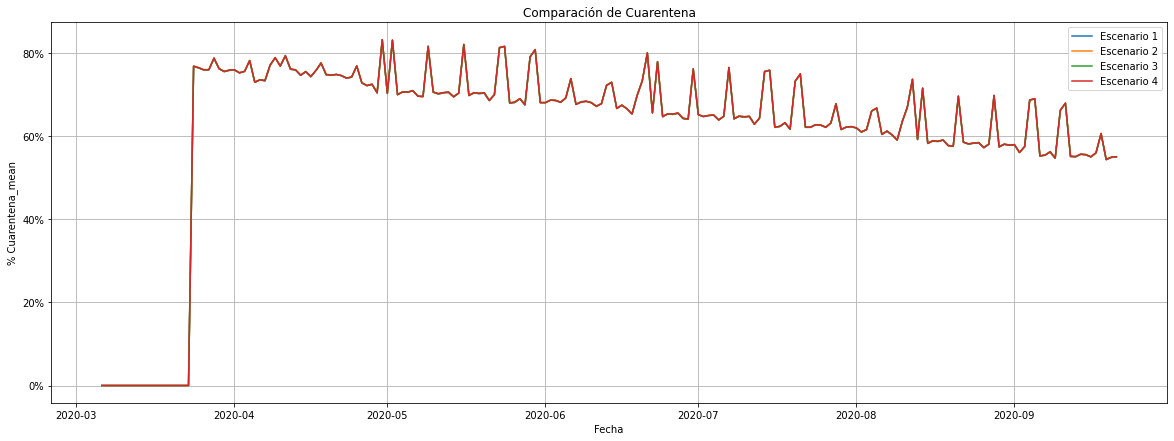

In [17]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( series1_grouped.index, series1_grouped[ 'Cuarentena_mean' ], label = 'Escenario 1' )

ax.plot( series2_grouped.index, series2_grouped[ 'Cuarentena_mean' ], label = 'Escenario 2' )

ax.plot( series3_grouped.index, series3_grouped[ 'Cuarentena_mean' ], label = 'Escenario 3' )

ax.plot( series4_grouped.index, series4_grouped[ 'Cuarentena_mean' ], label = 'Escenario 4' )

ax.set_yticklabels( [ '{:,.0%}'.format( x ) for x in ax.get_yticks() ] )

plt.title( 'Comparación de Cuarentena' )
plt.xlabel( 'Fecha' )
plt.ylabel( '% Cuarentena_mean' )
plt.grid( True )
plt.legend()